# Hamming weight and Pearson Correlation

This notebook demonstrates how to guess a floating number using Hamming Weight model.


We generate a random secret floating number. Then we use hamming weight model to guess the number.

We develop a method of devide-and-conquer to quickly arrive to the close number with a defined precision.

## Guessing...

In [1]:
import struct
import numpy as np
import pandas as pd
import random

def float_to_bin(num):
    bits, = struct.unpack('!I', struct.pack('!f', num))
    return "{:032b}".format(bits)

def hamming_weight(num):
    return float_to_bin(num).count('1')

In [2]:
def compute_corr(secret_number, guess_range, number_tests, known_inputs):
        low, high = guess_range
        guess_val = np.arange(low, high, (high-low)/(number_tests-1.0+1e-5))
        hw = pd.DataFrame(columns=guess_val, data=known_inputs.reshape(-1, 1) * guess_val)
        hw['actual'] = known_inputs * secret_number
        corr = hw.applymap(lambda x: hamming_weight(x)).corr(method='pearson')
        return corr['actual'].drop('actual').mean()


def guess_number_range(secret_number, guess_range, prescision, number_tests, known_inputs):
    n_cycles = 0
    while (guess_range[1] - guess_range[0]) > prescision:
        n_cycles = n_cycles + 1
        print('***[%d] guess_range =' % n_cycles, guess_range)
        range_middle_value = (guess_range[1] + guess_range[0]) / 2.0
        sub_ranges = [(guess_range[0], range_middle_value), (range_middle_value, guess_range[1])]
        low_corr = compute_corr(secret_number, sub_ranges[0], number_tests, known_inputs)
        high_corr = compute_corr(secret_number, sub_ranges[1], number_tests, known_inputs)
        
        print('low_corr =', low_corr,', high_corr =', high_corr)
        if low_corr > high_corr:
            guess_range = sub_ranges[0]
        else:
            guess_range = sub_ranges[1]
    return guess_range

## Test single point

In [3]:
#
# initalize parameter and generate a random number (secret number)
number_tests = 20
known_inputs = np.random.uniform(-1e0, 1e0, 10000) * 1e1
guess_range = (-3, 3)
secret_number = random.uniform(guess_range[0], guess_range[1])
prescision = 1e-5
guess_range = guess_number_range(secret_number, guess_range, prescision, number_tests, known_inputs)

***[1] guess_range = (-3, 3)
low_corr = 0.09767944837794669 , high_corr = 0.16635147515604176
***[2] guess_range = (0.0, 3)
low_corr = 0.11425119180095122 , high_corr = 0.21348894984781905
***[3] guess_range = (1.5, 3)
low_corr = 0.27333318172322085 , high_corr = 0.1691172325783477
***[4] guess_range = (1.5, 2.25)
low_corr = 0.2625496139428708 , high_corr = 0.29026213164556436
***[5] guess_range = (1.875, 2.25)
low_corr = 0.3326570928779694 , high_corr = 0.24557416861522308
***[6] guess_range = (1.875, 2.0625)
low_corr = 0.3669399134923365 , high_corr = 0.2997884651830053
***[7] guess_range = (1.875, 1.96875)
low_corr = 0.3602626371269279 , high_corr = 0.38161029716539013
***[8] guess_range = (1.921875, 1.96875)
low_corr = 0.41710126300765255 , high_corr = 0.34339393737009205
***[9] guess_range = (1.921875, 1.9453125)
low_corr = 0.45936654445966213 , high_corr = 0.37903283206559363
***[10] guess_range = (1.921875, 1.93359375)
low_corr = 0.4887133349587652 , high_corr = 0.42968929971021

In [4]:
print('the secret number =', secret_number)
guessed_number = (guess_range[1] + guess_range[0]) / 2.0
print('the guessed number =', guessed_number)
error_rate = abs((guessed_number - secret_number) / secret_number) * 100
print('error rate = %0.4f' % error_rate, '%')

the secret number = 1.9260443823722078
the guessed number = 1.9260435104370117
error rate = 0.0000 %


## Test multiple points

In [5]:
# initialize
guess_range = (-1e-2, 1e-2)
prescision = 1e-6
number_tests = 10

secret_numbers = np.sort(np.random.uniform(guess_range[0], guess_range[1], 20))
known_inputs = np.random.uniform(-1.0, 1.0, 1000) * 1e-4

results = pd.Series(index=secret_numbers, name='guessed_numbers', dtype=np.float32)
for idx in results.index:
    grange = guess_number_range(idx, guess_range, prescision, number_tests, known_inputs)
    results[idx] = (grange[1] + grange[0]) / 2.0

***[1] guess_range = (-0.01, 0.01)
low_corr = 0.06589269710053876 , high_corr = -0.031949531578085666
***[2] guess_range = (-0.01, 0.0)
low_corr = 0.06684322912334188 , high_corr = 0.05158413445609228
***[3] guess_range = (-0.01, -0.005)
low_corr = 0.11862838679318233 , high_corr = 0.045301085280310696
***[4] guess_range = (-0.01, -0.0075)
low_corr = 0.08572305180843755 , high_corr = 0.1323749130732676
***[5] guess_range = (-0.00875, -0.0075)
low_corr = 0.17835260576167983 , high_corr = 0.07855195019841252
***[6] guess_range = (-0.00875, -0.008125)
low_corr = 0.17896789140867844 , high_corr = 0.1327427315178315
***[7] guess_range = (-0.00875, -0.0084375)
low_corr = 0.1998578672088818 , high_corr = 0.18115654479688723
***[8] guess_range = (-0.00875, -0.00859375)
low_corr = 0.15481442141020502 , high_corr = 0.2579913109782195
***[9] guess_range = (-0.008671875, -0.00859375)
low_corr = 0.2050317291275851 , high_corr = 0.30406860263803714
***[10] guess_range = (-0.0086328125, -0.00859375)


low_corr = 0.047505070690856896 , high_corr = -0.04041620725844352
***[2] guess_range = (-0.01, 0.0)
low_corr = 0.026009291346607573 , high_corr = 0.06128497807444091
***[3] guess_range = (-0.005, 0.0)
low_corr = 0.08852508328349135 , high_corr = 0.04026514343508149
***[4] guess_range = (-0.005, -0.0025)
low_corr = 0.06783919251756976 , high_corr = 0.11302202861773984
***[5] guess_range = (-0.00375, -0.0025)
low_corr = 0.1602785173135309 , high_corr = 0.06246445973183434
***[6] guess_range = (-0.00375, -0.003125)
low_corr = 0.18109289557427655 , high_corr = 0.13036817558001507
***[7] guess_range = (-0.00375, -0.0034375)
low_corr = 0.121261821333071 , high_corr = 0.23066449488469684
***[8] guess_range = (-0.0035937499999999997, -0.0034375)
low_corr = 0.19254633213070763 , high_corr = 0.2605957448634509
***[9] guess_range = (-0.0035156249999999997, -0.0034375)
low_corr = 0.2735710785024762 , high_corr = 0.27202465140417914
***[10] guess_range = (-0.0035156249999999997, -0.003476562499999

low_corr = 0.4050999505588121 , high_corr = 0.491587756116351
***[1] guess_range = (-0.01, 0.01)
low_corr = 0.07593812184877699 , high_corr = -0.026269944155061113
***[2] guess_range = (-0.01, 0.0)
low_corr = 0.05743376639346098 , high_corr = 0.07255885480868507
***[3] guess_range = (-0.005, 0.0)
low_corr = 0.04954941657599658 , high_corr = 0.07745002799329016
***[4] guess_range = (-0.0025, 0.0)
low_corr = 0.04151089539064701 , high_corr = 0.105885352363657
***[5] guess_range = (-0.00125, 0.0)
low_corr = 0.10992650397118364 , high_corr = 0.08964645151492849
***[6] guess_range = (-0.00125, -0.000625)
low_corr = 0.13358967339759006 , high_corr = 0.07919714349436255
***[7] guess_range = (-0.00125, -0.0009375)
low_corr = 0.16704251707595108 , high_corr = 0.09328020919581363
***[8] guess_range = (-0.00125, -0.00109375)
low_corr = 0.18890477998405664 , high_corr = 0.11532417831782563
***[9] guess_range = (-0.00125, -0.0011718750000000002)
low_corr = 0.25825168747125343 , high_corr = 0.126185

low_corr = 0.07741436188953292 , high_corr = 0.04275292013589299
***[3] guess_range = (0.0, 0.005)
low_corr = 0.052910084110407686 , high_corr = 0.07060400653252673
***[4] guess_range = (0.0025, 0.005)
low_corr = 0.0477170428191244 , high_corr = 0.10410507893227323
***[5] guess_range = (0.00375, 0.005)
low_corr = 0.07027675565512237 , high_corr = 0.15848370552227214
***[6] guess_range = (0.004375, 0.005)
low_corr = 0.11231774164670512 , high_corr = 0.17863352280860764
***[7] guess_range = (0.004687500000000001, 0.005)
low_corr = 0.16954739897648008 , high_corr = 0.20795848909739778
***[8] guess_range = (0.004843750000000001, 0.005)
low_corr = 0.2562975128945217 , high_corr = 0.16477112932817586
***[9] guess_range = (0.004843750000000001, 0.004921875000000001)
low_corr = 0.3052114561832931 , high_corr = 0.20273501440192687
***[10] guess_range = (0.004843750000000001, 0.004882812500000001)
low_corr = 0.2714724244545308 , high_corr = 0.3227972604958021
***[11] guess_range = (0.00486328125

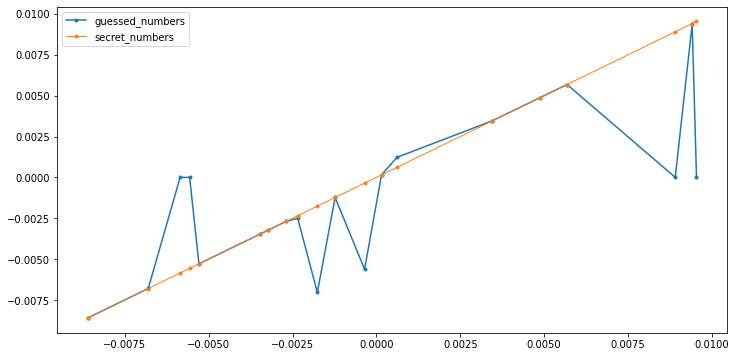

In [6]:
ax = results.plot(figsize = (12, 6), marker='.')
ax.plot(results.index, results.index, marker='.', linewidth=1, label='secret_numbers')
ax.legend()

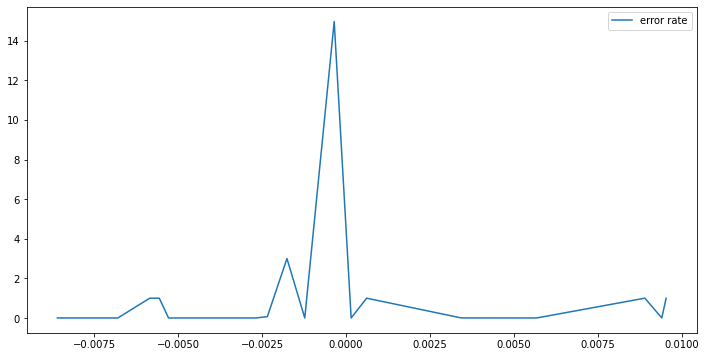

In [7]:
error_rate = ((results - results.index)/results.index).abs()
ax = error_rate.plot(figsize = (12, 6), label='error rate')
ax.legend()

# Batinna method

In [8]:
def batina_guess_number(secret_number, guess_range, prescision, known_inputs):
    low, high = guess_range
    guess_val = np.arange(low, high, prescision)
    print('matrix size = %d x %d' % (len(known_inputs), len(guess_val)))
    hw = pd.DataFrame(columns=guess_val, data=known_inputs.reshape(-1, 1) * guess_val)
    hw['actual'] = known_inputs * secret_number
    print('calculate correlation...')
    corr = hw.applymap(lambda x: hamming_weight(x)).corr(method='pearson')
    return corr['actual'].drop('actual').idxmax()

In [13]:
batinta_results = pd.Series(index=secret_numbers, name='guessed_numbers', dtype=np.float32)
for idx in batinta_results.index:
    batinta_results[idx] = batina_guess_number(idx, guess_range, prescision * 10, known_inputs)
    print('secret_value = %f, guessed_value = %f' % (idx, batinta_results[idx]))

matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.008602, guessed_value = -0.008600
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.006799, guessed_value = -0.006800
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.005849, guessed_value = -0.005850
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.005566, guessed_value = -0.005560
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.005288, guessed_value = -0.005290
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.003474, guessed_value = -0.003470
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.003229, guessed_value = -0.003230
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.002685, guessed_value = -0.005370
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.002345, guessed_value = -0.002350
matrix size = 1000 x 2001
calculate correlation...
secret_value = -0.0017

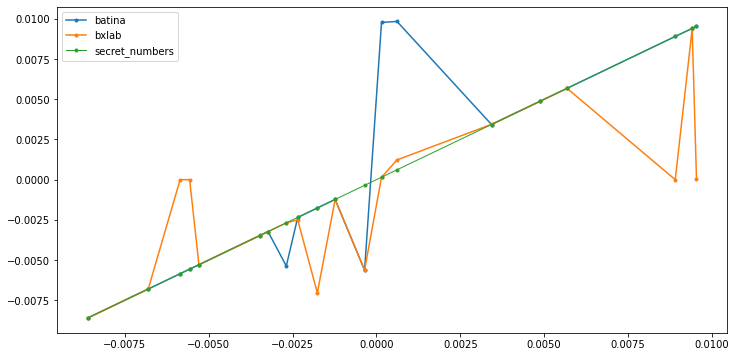

In [14]:
ax = batinta_results.plot(figsize = (12, 6), marker='.', label='batina')
results.plot(ax=ax, marker='.', label='bxlab')
ax.plot(batinta_results.index, batinta_results.index, marker='.', linewidth=1, label='secret_numbers')
ax.legend()

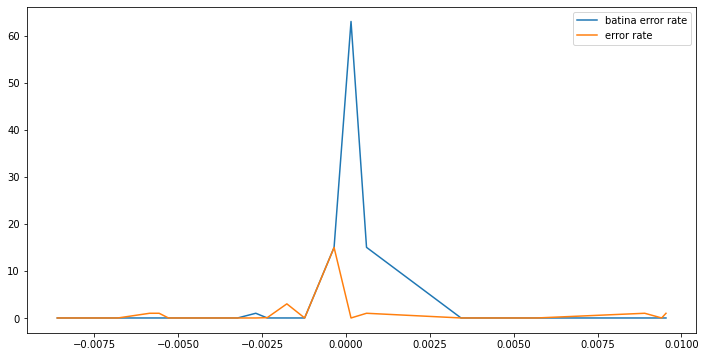

In [16]:
batina_error_rate = ((batinta_results - batinta_results.index)/batinta_results.index).abs()
ax = batina_error_rate.plot(figsize = (12, 6), label='batina error rate')
ax = error_rate.plot(ax=ax, label='error rate')
ax.legend()